In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# plt.style.use('fivethirtyeight');

In [2]:
df = pd.read_csv('Gasoline.csv')
df = df.set_index(pd.DatetimeIndex(df['Tanggal'].values))

df.head()

Tanggal    qty       Jumlah
2016-01-01  2016-01-01   8694   63467076.0
2016-01-02  2016-01-02  10044   73320032.0
2016-01-03  2016-01-03  13928  101671188.0
2016-01-04  2016-01-04  12518   91382972.0
2016-01-05  2016-01-05  11112   77424375.0

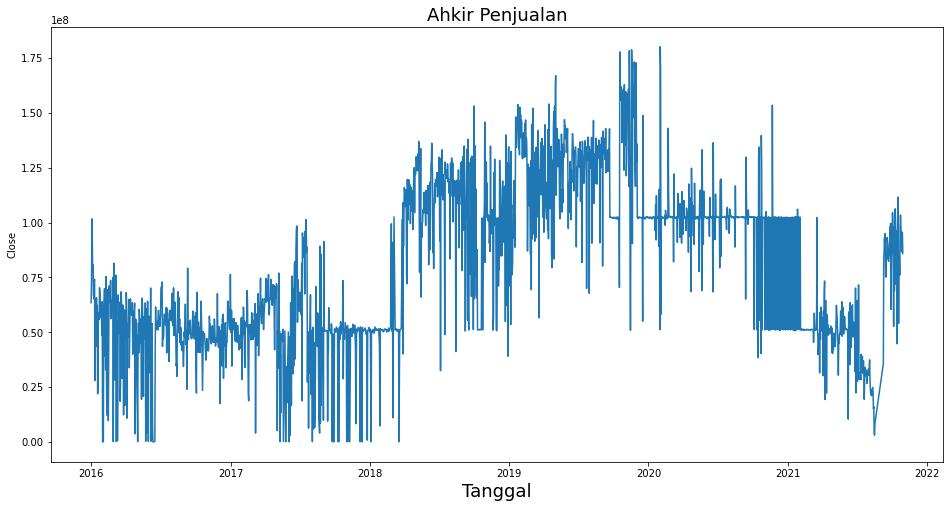

In [3]:
plt.figure(figsize=(16,8))
plt.title('Ahkir Penjualan',fontsize=18)
plt.plot(df['Jumlah'])
plt.xlabel('Tanggal',fontsize=18)
plt.ylabel('Close')
plt.show()

In [4]:
# Function Untuk Simple Moving Average
def SMA(data,period = 30, column='Jumlah'):
    return data[column].rolling(window=period).mean()

In [5]:
df['SMA20'] = SMA(df,20)
df['SMA50'] = SMA(df,50)

In [6]:
# Harga Saham yang wajib di beli dan di jual Di sarankan
df['Signal'] = np.where(df['SMA20']>df['SMA50'],1,0);
df['Position'] = df['Signal'].diff()


# df['Buy'] = np.where(df['Position'] == 1, df['Jumlah'],np.NAN)
# df['Sell'] = np.where(df['Position'] == 0, df['Jumlah'],np.NAN)

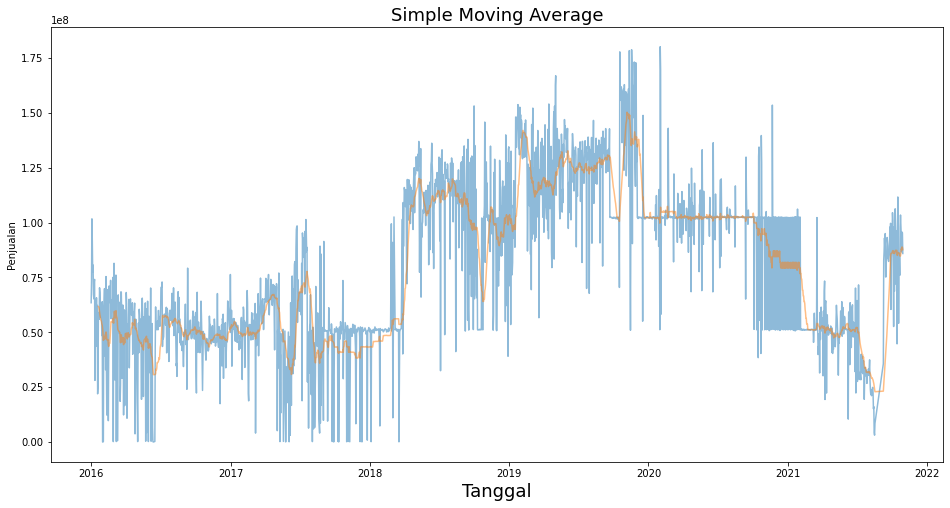

In [7]:
# Menampilkan Hasil
plt.figure(figsize=(16,8))
plt.title('Simple Moving Average',fontsize=18)
plt.plot(df['Jumlah'],alpha = 0.5, label='Jumlah')
plt.plot(df['SMA20'],alpha = 0.5, label='SMA20')
# plt.plot(df['SMA50'],alpha = 0.5, label='SMA50')
plt.xlabel('Tanggal',fontsize=18)
plt.ylabel('Penjualan')
plt.show()

In [31]:
df['EMA50'] = df['Jumlah'].rolling(5).mean()
df

Tanggal    qty       Jumlah       SMA20       SMA50  Signal  \
2016-01-01  2016-01-01   8694   63467076.0         NaN         NaN       0   
2016-01-02  2016-01-02  10044   73320032.0         NaN         NaN       0   
2016-01-03  2016-01-03  13928  101671188.0         NaN         NaN       0   
2016-01-04  2016-01-04  12518   91382972.0         NaN         NaN       0   
2016-01-05  2016-01-05  11112   77424375.0         NaN         NaN       0   
...                ...    ...          ...         ...         ...     ...   
2021-10-25  2021-10-25  12239   93628350.0  88077892.5  82501417.0       1   
2021-10-26  2021-10-26  11319   86590350.0  87509115.0  84170341.0       1   
2021-10-27  2021-10-27  12502   95640300.0  88857810.0  85912552.0       1   
2021-10-28  2021-10-28  12456   95288400.0  88638637.5  87103963.0       1   
2021-10-29  2021-10-29  11228   85894200.0  87621187.5  87164398.0       1   

            Position       EMA50  
2016-01-01       NaN         NaN  
2016-01-02       0.0         NaN  
2016-01-03       0.0         NaN  
2016-01-04       0.0         NaN  
2016-01-05       0.0  81453128.6  
...              ...         ...  
2021-10-25       0.0  93955770.0  
2021-10-26       0.0  96085530.0  
2021-10-27       0.0  95576040.0  
2021-10-28       0.0  93951180.0  
2021-10-29       0.0  91408320.0  

[1998 rows x 8 columns]

In [32]:
df['EMA20'] = df['Jumlah'].ewm(span=20, adjust=False).mean()
df['EMA50'] = df['Jumlah'].ewm(span=50, adjust=False).mean()
df

Tanggal    qty       Jumlah       SMA20       SMA50  Signal  \
2016-01-01  2016-01-01   8694   63467076.0         NaN         NaN       0   
2016-01-02  2016-01-02  10044   73320032.0         NaN         NaN       0   
2016-01-03  2016-01-03  13928  101671188.0         NaN         NaN       0   
2016-01-04  2016-01-04  12518   91382972.0         NaN         NaN       0   
2016-01-05  2016-01-05  11112   77424375.0         NaN         NaN       0   
...                ...    ...          ...         ...         ...     ...   
2021-10-25  2021-10-25  12239   93628350.0  88077892.5  82501417.0       1   
2021-10-26  2021-10-26  11319   86590350.0  87509115.0  84170341.0       1   
2021-10-27  2021-10-27  12502   95640300.0  88857810.0  85912552.0       1   
2021-10-28  2021-10-28  12456   95288400.0  88638637.5  87103963.0       1   
2021-10-29  2021-10-29  11228   85894200.0  87621187.5  87164398.0       1   

            Position         EMA50         EMA20  
2016-01-01       NaN  6.346708e+07  6.346708e+07  
2016-01-02       0.0  6.385347e+07  6.440545e+07  
2016-01-03       0.0  6.533651e+07  6.795457e+07  
2016-01-04       0.0  6.635794e+07  7.018585e+07  
2016-01-05       0.0  6.679192e+07  7.087523e+07  
...              ...           ...           ...  
2021-10-25       0.0  7.849471e+07  8.803698e+07  
2021-10-26       0.0  7.881219e+07  8.789921e+07  
2021-10-27       0.0  7.947212e+07  8.863646e+07  
2021-10-28       0.0  8.009236e+07  8.926997e+07  
2021-10-29       0.0  8.031989e+07  8.894847e+07  

[1998 rows x 9 columns]

In [33]:
# plt.figure(figsize=(16,8))
# plt.title('EXponential Moving Average',fontsize=18)
# plt.plot(df['Jumlah'],alpha = 0.3, label='Jumlah')
# plt.plot(df['SMA20'],alpha = 1, label='SMA20') 
# plt.plot(df['SMA50'],alpha = 1, label='SMA50')
# plt.plot(df['EMA50'],alpha = 1, label='EMA50')
# plt.xlabel('Tanggal',fontsize=18)
# plt.ylabel('Penjualan')
# plt.show()


<AxesSubplot: >

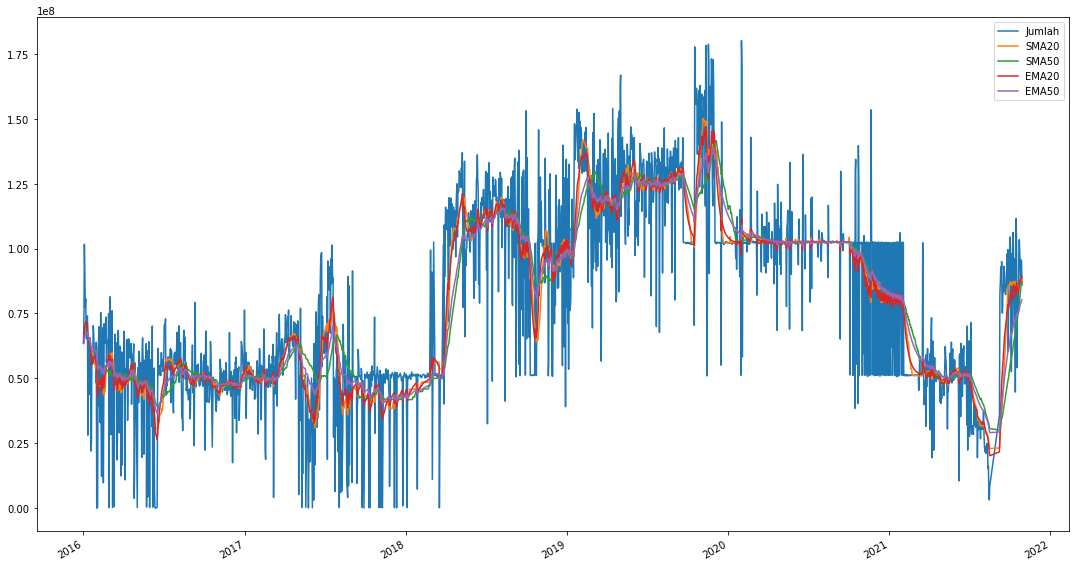

In [34]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5,10.5)
df[['Jumlah','SMA20','SMA50','EMA20','EMA50']].plot(ax=ax)